In [1]:
# 1° Problema de Negócio
# Dano veicular
# Arquivo Dano.csv

import ipywidgets as widgets
from IPython.display import display

style = {'Descrição_Variáveis':'initial'}

In [2]:
# importando Bibliotecas Essenciais
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
# Importando o dataset - Fonte dos Dados
file_name = 'dano.csv'
dataset = pd.read_csv(file_name, delimiter= ';')
dataset.head()

,ID_Veicular,Laterais,Dianteira,Traseira,Teto,Dano_Veicular
0,0,5.1,3.5,1.4,0.2,Dano-Alto
1,1,4.9,3.0,1.4,0.2,Dano-Alto
2,2,4.7,3.2,1.3,0.2,Dano-Alto
3,3,4.6,3.1,1.5,0.2,Dano-Alto
4,4,5.0,3.6,1.4,0.2,Dano-Alto


In [16]:
print(f"Dataset têm {dataset.shape[0]} linhas e {dataset.shape[1]} colunas.")

Dataset têm 150 linhas e 6 colunas.


In [8]:
dataset.shape

(150, 6)

In [37]:
# Gráfico de visualização dos dados
wig_col = widgets.Dropdown(
              options=[col for col in dataset.columns.tolist() if col.startswith(('Laterais', 'Dianteria', 'Trazeira','Teto'))],
              description='Choose a Column to Plot vs. attributes', 
              disabled= False,
              layot= widgets.Layout(width='40%', height='40px'),
              style= style)


Dropdown(description='Choose a Column to Plot vs. attributes', options=('Laterais', 'Teto'), value='Laterais')

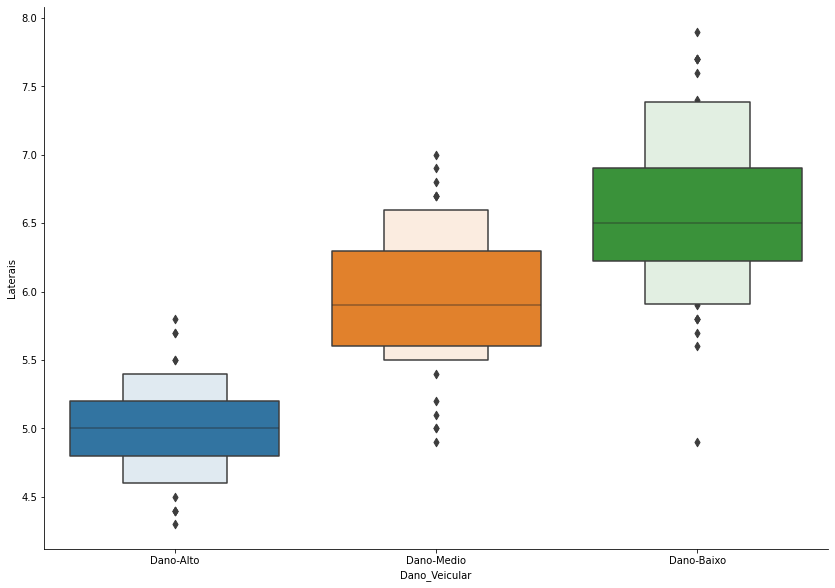

In [38]:
display(wig_col)

sns.catplot(x="Dano_Veicular", y=wig_col.value, kind="boxen", data=dataset, height=8.27, aspect=11.7/8.27);

In [39]:
# 3° Pré-Processamento dos Dados
# Separado as variáveis de Entrada e saída do Modelo
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [45]:
print("\nVariáveis de Entrada da Avaliação:\n\n", X[:5])
print("\nResultado do Dano: \n\n", y[5])


Variáveis de Entrada da Avaliação:

    ID_Veicular  Laterais  Dianteira  Traseira  Teto
0            0       5.1        3.5       1.4   0.2
1            1       4.9        3.0       1.4   0.2
2            2       4.7        3.2       1.3   0.2
3            3       4.6        3.1       1.5   0.2
4            4       5.0        3.6       1.4   0.2

Resultado do Dano: 

 Dano-Alto


In [48]:
# Encode Classes
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataset['Dano_Veicular'] = labelencoder.fit_transform(dataset['Dano_Veicular'])


In [50]:
dataset['Dano_Veicular'].unique()

array([0, 2, 1])

In [54]:
# Separando os dados entre treino e teste de forma interativa
# 4 criando dados de treino e teste
from sklearn.model_selection import train_test_split
test_size = widgets.FloatSlider(min=0.01, max=0.6, value=0.2, description="Test Size:", tooltips=['Usually 20-30%'])
display(test_size)

FloatSlider(value=0.2, description='Test Size:', max=0.6, min=0.01)

In [59]:
# Divide o dataset em treino e test
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size= test_size.value, random_state= 7)

In [62]:
print("Dados de Treino :\n------------\n")
print("X = \n", X_train[:5])
print("y = \n", y_train[:5])

Dados de Treino :
------------

X = 
      ID_Veicular  Laterais  Dianteira  Traseira  Teto
126          126       6.2        2.8       4.8   1.8
79            79       5.7        2.6       3.5   1.0
22            22       4.6        3.6       1.0   0.2
139          139       6.9        3.1       5.4   2.1
74            74       6.4        2.9       4.3   1.3
y = 
 126    Dano-Baixo
79     Dano-Medio
22      Dano-Alto
139    Dano-Baixo
74     Dano-Medio
Name: Dano_Veicular, dtype: object


In [63]:
print("\n\nDados de Teste: \n------------\n")
print("X= \n", X_test[:5])
print("y = \n", y_test[:5])



Dados de Teste: 
------------

X= 
      ID_Veicular  Laterais  Dianteira  Traseira  Teto
149          149       5.9        3.0       5.1   1.8
84            84       5.4        3.0       4.5   1.5
40            40       5.0        3.5       1.3   0.3
66            66       5.6        3.0       4.5   1.5
106          106       4.9        2.5       4.5   1.7
y = 
 149    Dano-Baixo
84     Dano-Medio
40      Dano-Alto
66     Dano-Medio
106    Dano-Baixo
Name: Dano_Veicular, dtype: object


In [66]:
print(f"Shape dos dados de treino é {X_train.shape}")
print(f"Shape dos dados de teste é {X_test.shape}")

Shape dos dados de treino é (120, 5)
Shape dos dados de teste é (30, 5)


In [67]:
# Pradonizando as Features - As Variáveis(variáveis de entrada)
# média X = 0 e desvio = 1
# Recurso de Escala
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("\n------------\nDataset depois na padronização:\n-------------\n",)

print("\nX_train :\n", X_train[:5])
print("--------")
print("\nX_test :\n", X_test[:5])


------------
Dataset depois na padronização:
-------------


X_train :
 [[ 1.20732325  0.43325894 -0.59653573  0.62601116  0.82081788]
 [ 0.14948526 -0.15754871 -1.05688485 -0.09737951 -0.21464226]
 [-1.13342464 -1.45732553  1.24486074 -1.48851543 -1.2501024 ]
 [ 1.49991673  1.26038965  0.09398794  0.95988378  1.20911544]
 [ 0.03694931  0.669582   -0.36636117  0.34778398  0.17365529]]
--------

X_test :
 [[ 1.72498864  0.07877435 -0.13618661  0.79294747  0.82081788]
 [ 0.26202122 -0.51203329 -0.13618661  0.45907485  0.43252033]
 [-0.72829519 -0.98467941  1.01468618 -1.32157912 -1.12066988]
 [-0.14310822 -0.27571024 -0.13618661  0.45907485  0.43252033]
 [ 0.75717942 -1.10284094 -1.28705941  0.45907485  0.69138537]]


In [68]:
# 4° Construindo a Máquina Preditiva com KNN Classifier
# Importando KNN Library
from sklearn.neighbors import KNeighborsClassifier


In [69]:
 # Configuração dos tarametros do Modelo
 neigh_wig = widgets.Dropdown(options=[1, 10, 30, 100],
                              description= "Numbers of Neighbours=", style=style)
 
 display(neigh_wig)

Dropdown(description='Numbers of Neighbours=', options=(1, 10, 30, 100), value=1)

In [78]:
Maquina_Preditiva = KNeighborsClassifier(n_neighbors=neigh_wig.value)
# Treinando a Máquina preditiva
# Realimentando o dado de treino no Classifier
Maquina_Preditiva.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [79]:
# predite a espécie para o teste
y_pred = Maquina_Preditiva.predict(X_test)

print("\n----------\n")
print("Valores Preditos com dados de Teste :\n", y_pred)
print("\n----------\n")
print("valores Reais com dados de Teste :\n", y_test)


----------

Valores Preditos com dados de Teste :
 ['Dano-Baixo' 'Dano-Medio' 'Dano-Alto' 'Dano-Medio' 'Dano-Medio'
 'Dano-Alto' 'Dano-Medio' 'Dano-Medio' 'Dano-Alto' 'Dano-Medio'
 'Dano-Medio' 'Dano-Medio' 'Dano-Alto' 'Dano-Baixo' 'Dano-Alto'
 'Dano-Medio' 'Dano-Baixo' 'Dano-Baixo' 'Dano-Alto' 'Dano-Alto'
 'Dano-Medio' 'Dano-Baixo' 'Dano-Medio' 'Dano-Baixo' 'Dano-Baixo'
 'Dano-Baixo' 'Dano-Medio' 'Dano-Medio' 'Dano-Baixo' 'Dano-Baixo']

----------

valores Reais com dados de Teste :
 149    Dano-Baixo
84     Dano-Medio
40      Dano-Alto
66     Dano-Medio
106    Dano-Baixo
41      Dano-Alto
52     Dano-Medio
94     Dano-Medio
11      Dano-Alto
51     Dano-Medio
77     Dano-Medio
85     Dano-Medio
32      Dano-Alto
109    Dano-Baixo
28      Dano-Alto
70     Dano-Medio
108    Dano-Baixo
137    Dano-Baixo
46      Dano-Alto
37      Dano-Alto
82     Dano-Medio
120    Dano-Baixo
63     Dano-Medio
119    Dano-Baixo
129    Dano-Baixo
138    Dano-Baixo
97     Dano-Medio
80     Dano-Medio
101  

In [80]:
# 5° Avaliando a máquina Preditiva
from sklearn import metrics
print("Acurácia da Máquina =", metrics.accuracy_score(y_test, y_pred))


Acurácia da Máquina = 0.9666666666666667


In [81]:
# Comparando real e Predito com os dados de Teste
print("\nReal vs Predito \n--------\n")
error_df = pd.DataFrame({"Real": y_test, "Predito" : y_pred})
error_df


Real vs Predito 
--------



,Real,Predito
149,Dano-Baixo,Dano-Baixo
84,Dano-Medio,Dano-Medio
40,Dano-Alto,Dano-Alto
66,Dano-Medio,Dano-Medio
106,Dano-Baixo,Dano-Medio
41,Dano-Alto,Dano-Alto
52,Dano-Medio,Dano-Medio
94,Dano-Medio,Dano-Medio
11,Dano-Alto,Dano-Alto
51,Dano-Medio,Dano-Medio


In [ ]:
# Usando a confusion matrix para avaliar a acurácia e de mais indicadores
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(cr)